# K-means clustering

The notebook aims to study and implement a k-means clustering using "sklearn". The iris dataset will be used to identify clusters automatically using the K-means method.


## Acknowledgments

- Used dataset: https://archive.ics.uci.edu/ml/datasets/iris

- Inquiries: mauricio.antelis@tec.mx


# Importing libraries

In [8]:
# Import the packages that we will be using
import numpy as np                  # For array
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily


In [7]:
# Define where you are running the code: colab or local
RunInColab          = True     # (False: no  | True: yes)

# If running in colab:
if RunInColab:
    # Mount your Google Drive in Google Colab
    from google.colab import drive
    drive.mount('/content/drive')

    # Find location (optional to check contents)
    #!pwd
    #!ls
    #!ls "/content/drive/MyDrive/Carpeta D1/D1/D1/"

    # Define path del proyecto
    Ruta = "/content/drive/MyDrive/Carpeta D1/D1/D1/iris.data"

else:
    # Define path del proyecto (for local use, leave empty or set your local path)
    Ruta = ""

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing data

In [10]:
# Define the column names for the iris dataset
col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

# Dataset path
file_path = '/content/drive/MyDrive/Carpeta D1/D1/D1/iris.data'

# Load the dataset from the local file with the defined column names
df = pd.read_csv(file_path, header=None, names=col_names)


# Undertanding and preprocessing the data

1. Get a general 'feel' of the data


In [11]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


2. Drop rows with any missing values


In [12]:
df.dropna(inplace=True)

**3**. Encoding the class label categorical column: from string to num


In [13]:
# Encoding the categorical column {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2}
class_mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
df['class'] = df['class'].map(class_mapping)

# Visualize the dataset
df.head()


,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Now the label/category is numeric


4. Discard columns that won't be used


In [15]:
# If necesary, drop out non necesary columns


**5**. Scatter plot of the data

# Scatter plot: sepal length vs sepal width
plt.scatter(df['sepal_length'], df['sepal_width'], c=df['class'], cmap='viridis')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Scatter plot: Sepal Length vs Sepal Width')
plt.colorbar(label='Class')
plt.show()

# Scatter plot: petal length vs petal width
plt.scatter(df['petal_length'], df['petal_width'], c=df['class'], cmap='viridis')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Scatter plot: Petal Length vs Petal Width')
plt.colorbar(label='Class')
plt.show()

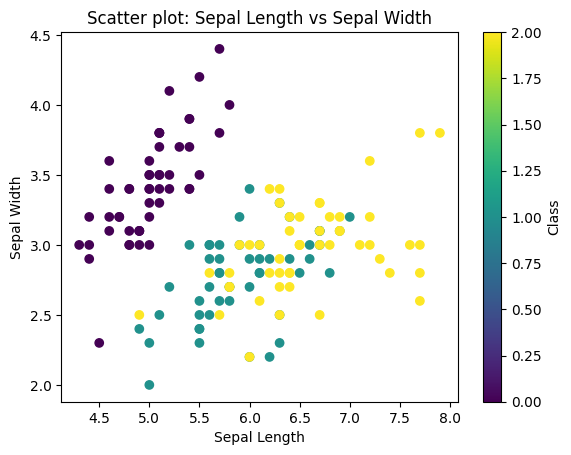

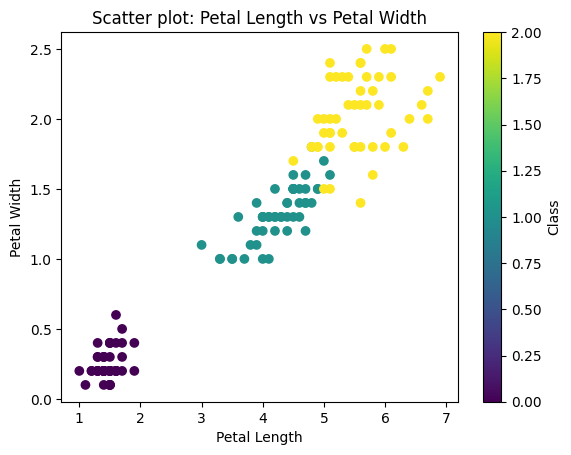

In [21]:
# Scatter plot: sepal length vs sepal width
plt.scatter(df['sepal_length'], df['sepal_width'], c=df['class'], cmap='viridis')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Scatter plot: Sepal Length vs Sepal Width')
plt.colorbar(label='Class')
plt.show()

# Scatter plot: petal length vs petal width
plt.scatter(df['petal_length'], df['petal_width'], c=df['class'], cmap='viridis')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Scatter plot: Petal Length vs Petal Width')
plt.colorbar(label='Class')
plt.show()

6. Scatter plot of the data asigning each point to the cluster it belongs to ¡¡

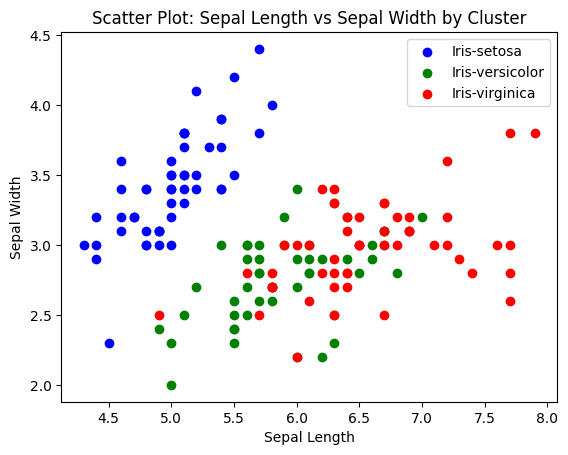

In [22]:
# Get dataframes for each real cluster
cluster_0 = df[df['class'] == 0]  # Iris-setosa
cluster_1 = df[df['class'] == 1]  # Iris-versicolor
cluster_2 = df[df['class'] == 2]  # Iris-virginica

# Scatter plot: Sepal length vs Sepal width, colored by cluster
plt.scatter(cluster_0['sepal_length'], cluster_0['sepal_width'], label='Iris-setosa', color='blue')
plt.scatter(cluster_1['sepal_length'], cluster_1['sepal_width'], label='Iris-versicolor', color='green')
plt.scatter(cluster_2['sepal_length'], cluster_2['sepal_width'], label='Iris-virginica', color='red')

# Adding labels and title
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Scatter Plot: Sepal Length vs Sepal Width by Cluster')
plt.legend()
plt.show()



Recall that for this dataset we know in advance the class to which each point belongs to

# Kmeans clustering

Kmeans clustering

In [24]:
# Import sklearn KMeans
from sklearn.cluster import KMeans

# Define number of clusters (3 for the iris dataset)
num_clusters = 3

# Do K-means clustering (assign each point in the dataset to a cluster)
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
df['cluster'] = kmeans.fit_predict(df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])

# Print estimated cluster of each point in the dataset
df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'cluster']].head()


,sepal_length,sepal_width,petal_length,petal_width,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


NOTE: the lables of the estimated clusters do not agree with the lables in the real labels, therefore, it will be important to pair the labels of the real and estimated clusters

In [25]:
# Manual pairing of the labels of the real and estimated clusters
cluster_to_class = {0: 'Iris-setosa', 1: 'Iris-virginica', 2: 'Iris-versicolor'}
df['estimated_class'] = df['cluster'].map(cluster_to_class)

# Print the dataframe to check the real and estimated labels side by side
df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class', 'estimated_class']].head()


,sepal_length,sepal_width,petal_length,petal_width,class,estimated_class
0,5.1,3.5,1.4,0.2,0,Iris-virginica
1,4.9,3.0,1.4,0.2,0,Iris-virginica
2,4.7,3.2,1.3,0.2,0,Iris-virginica
3,4.6,3.1,1.5,0.2,0,Iris-virginica
4,5.0,3.6,1.4,0.2,0,Iris-virginica


In [26]:
# Add a new column to the dataset with the cluster information
df['cluster'] = kmeans.labels_


In [27]:
# Label of the estimated clusters
kmeans.labels_


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [28]:
# Cluster centroids
kmeans.cluster_centers_


array([[5.88360656, 2.74098361, 4.38852459, 1.43442623],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85384615, 3.07692308, 5.71538462, 2.05384615]])

In [29]:
# Sum of squared error (SSE) of the final model
kmeans.inertia_


78.94506582597728

In [30]:
# The number of iterations required to converge
kmeans.n_iter_


7

<span style='color:Blue'> **Important remarks**  </span>

- The number of each cluster is randomly assigned
- The order of the numer in each cluster is random

# Plot estimated clusters

Plot estimated clusters

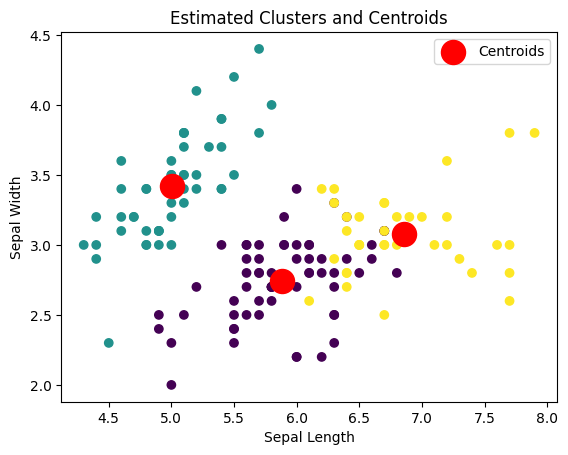

In [31]:
# Plot estimated clusters
plt.scatter(df['sepal_length'], df['sepal_width'], c=df['cluster'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Estimated Clusters and Centroids')
plt.legend()
plt.show()


## Plot both real and estimated clusters to check for errors

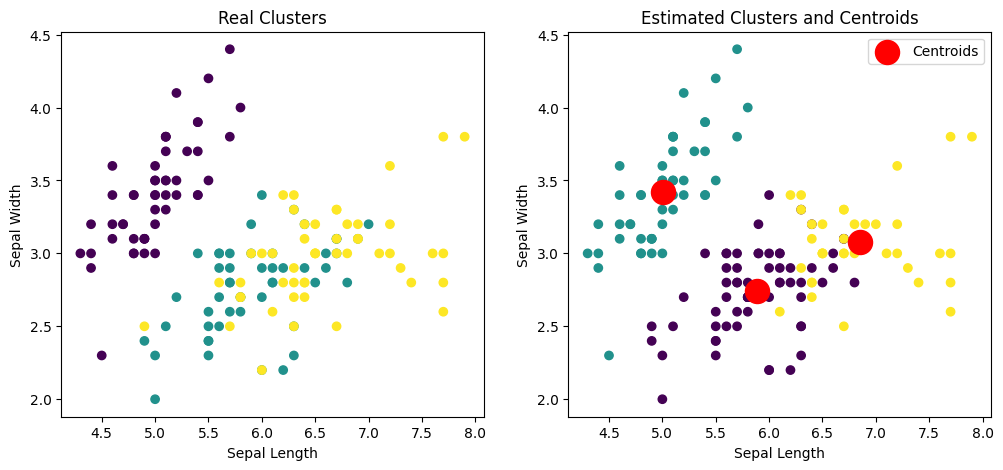

In [32]:

# Plot real clusters
plt.figure(figsize=(12, 5))

# Real clusters
plt.subplot(1, 2, 1)
plt.scatter(df['sepal_length'], df['sepal_width'], c=df['class'], cmap='viridis')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Real Clusters')

# Estimated clusters
plt.subplot(1, 2, 2)
plt.scatter(df['sepal_length'], df['sepal_width'], c=df['cluster'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Estimated Clusters and Centroids')

plt.legend()
plt.show()


In [ ]:
# Observaciones importantes

# K=2
# Cuando K = 2, K-means solo divide los datos en dos grupos, lo que puede no capturar la complejidad del conjunto de datos.
# En el conjunto de datos de Iris, esto agruparía algunas especies y no las separaría claramente.

# K=3
# Cuando K=3, K-means es más apropiado para el conjunto de datos Iris, ya que hay tres especies en el conjunto de datos.
# Este es el número natural de grupos y debería proporcionar la mejor separación entre especies.

#  K=4
# Cuando K = 4, K-means crea un grupo adicional innecesario, lo que conduce a un sobreajuste.
# Algunos puntos dentro de una especie pueden agruparse en un grupo separado incluso cuando pertenecen a la misma especie.

<span style='color:Blue'> **Important remarks**  </span>

- Note that for K=2 ...
- Note that for K=3 ...
- Note that for K=4 ...

Concluir

# Selecting K: elbow plot

Check the acurracy of the model using k-fold cross-validation

In [33]:
# Initialize a list to hold sum of squared error (sse)
sse = []

# Define values of k
k_values = range(1, 11)  # Evaluating K from 1 to 10

# For each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
    sse.append(kmeans.inertia_)


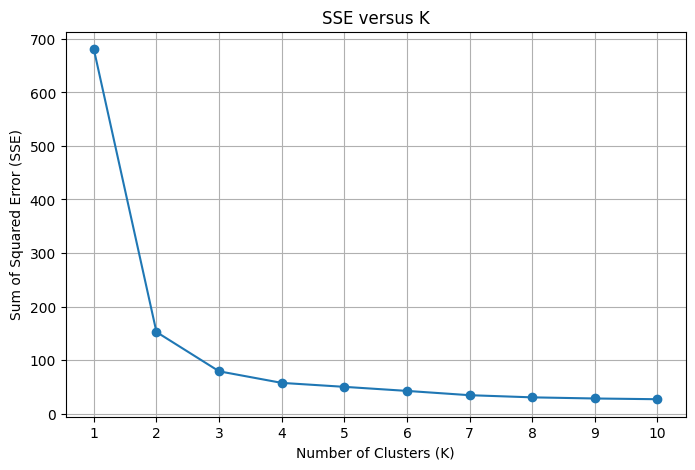

In [34]:
# Plot SSE versus K
plt.figure(figsize=(8, 5))
plt.plot(k_values, sse, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Error (SSE)')
plt.title('SSE versus K')
plt.xticks(k_values)
plt.grid()
plt.show()


Choose the k after which the sse is minimally reduced


In [35]:
# Choose the K after which the SSE is minimally reduced
sse_diff = np.diff(sse)
elbow_index = np.argmin(sse_diff[1:]) + 1  # +1 because np.diff reduces the length by 1
optimal_k = k_values[elbow_index]


# Final remarks

- The number of each cluster need to be assigned assigned

- The order of the number in each cluster is random

- If there is no information about the number of clusters k, then use the elbow plot method to choose the best number of clusters k

In [36]:
# The number of each cluster
cluster_counts = df['cluster'].value_counts()

# If there is no information about the number of clusters k
# Use the elbow plot method to choose the best number of clusters k
sse = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
    sse.append(kmeans.inertia_)

# Choose the K after which the SSE is minimally reduced
sse_diff = np.diff(sse)
elbow_index = np.argmin(sse_diff[1:]) + 1  # +1 because np.diff reduces the length by 1
optimal_k = k_values[elbow_index]
